## 伝説ポケモンの特徴ってなんだ？~主成分分析(教師なし学習)で解き明かす~
### https://qiita.com/tomoxxx/items/5c4a758c194a1362fa38

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

df = pd.read_csv('Pokemon.csv')
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [3]:
#カラム「Legendary」の値をbool型からint型へ変更
df['Legendary'] = df['Legendary'].astype(int)
#不要カラム削除
df= df.drop(['Name', 'Type 1','Type 2'], axis=1)

<AxesSubplot:xlabel='HP', ylabel='Attack'>

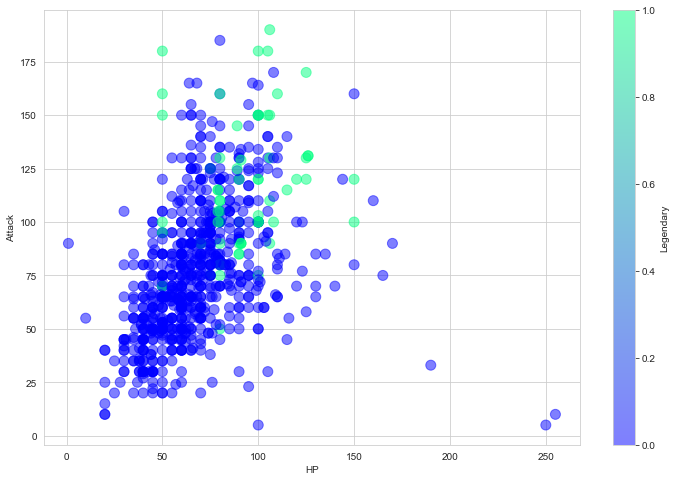

In [4]:
#とりあえず「HP」と「Attack」からLegendaryを可視化
fig, ax = plt.subplots(figsize=(12 , 8))
df.plot(kind='scatter', x='HP', y='Attack', s=100, 
        c='Legendary', cmap='winter', alpha=0.5, ax=ax)

In [5]:
#相関関係を数値化
df.loc[:, 'HP':'Speed'].corr()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
HP,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952
Attack,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240
Defense,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227
Sp. Atk,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018
Sp. Def,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133
Speed,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000


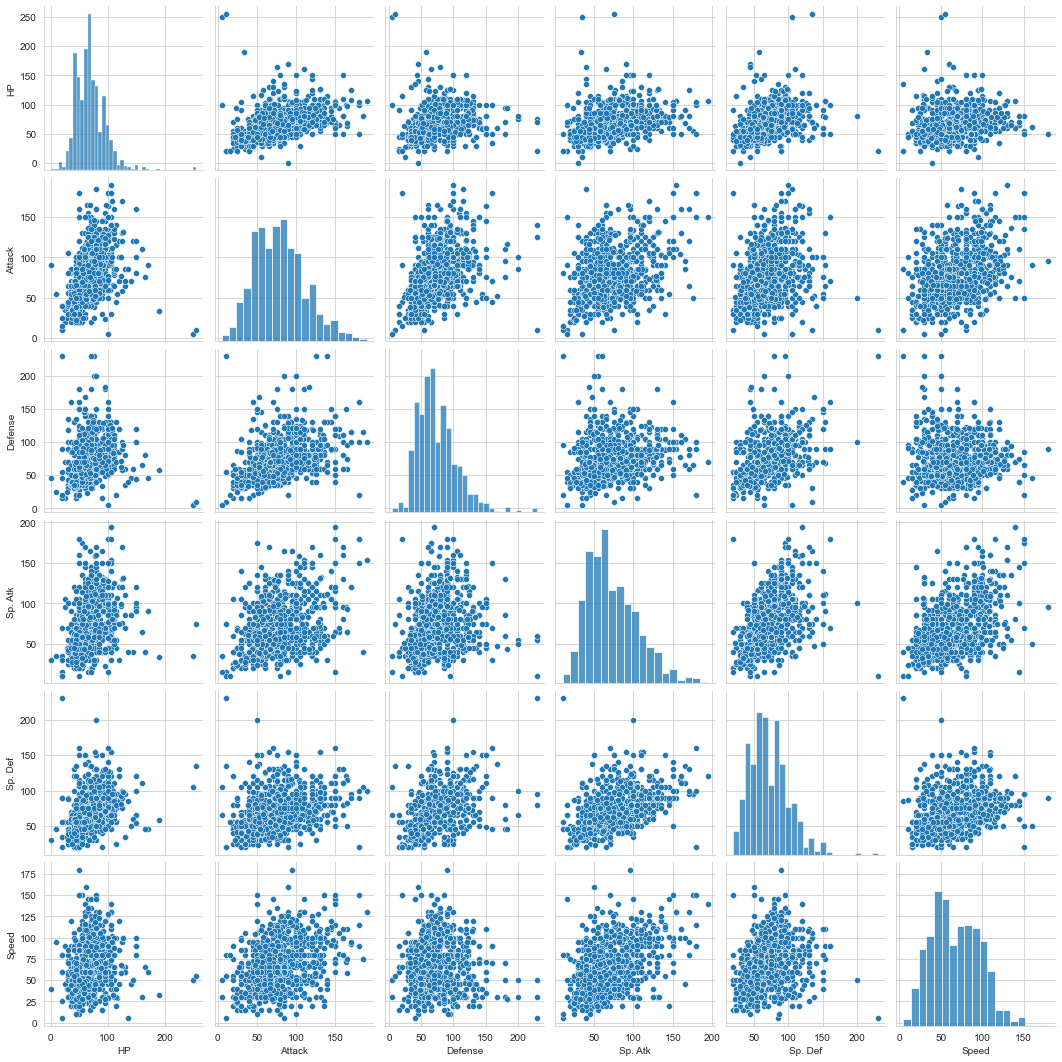

In [7]:
#相関関係を可視化
sns.pairplot(df.loc[:, 'HP':'Speed'])

In [9]:
from sklearn.decomposition import PCA
# 元の特徴量と同じ数で主成分分析
pca = PCA(n_components=6)#PCAインタンス生成
X_pca = pca.fit_transform(df.loc[:, 'HP':'Speed'])
df_pca = pd.DataFrame(X_pca, columns=['1st', '2nd', '3rd', '4th', '5th', '6th'])
df_pca.head()

,1st,2nd,3rd,4th,5th,6th
0,-45.860728,-5.384432,18.925550,-0.988558,-12.398527,10.548700
1,-11.152937,-5.805620,20.848717,0.269407,-5.800877,7.175004
2,36.946009,-5.236130,21.520463,1.531646,2.445413,3.159865
3,80.128413,18.995343,29.313909,-11.228419,-8.684840,0.214346
4,-50.385905,-21.792797,3.921880,-12.581893,-7.357519,3.041302


In [10]:
#寄与率(~主成分は全体のデータの内の何％の情報を表しているか)
pca.explained_variance_ratio_

array([0.46096131, 0.18752145, 0.13584163, 0.09803479, 0.07378238,
       0.04385843])

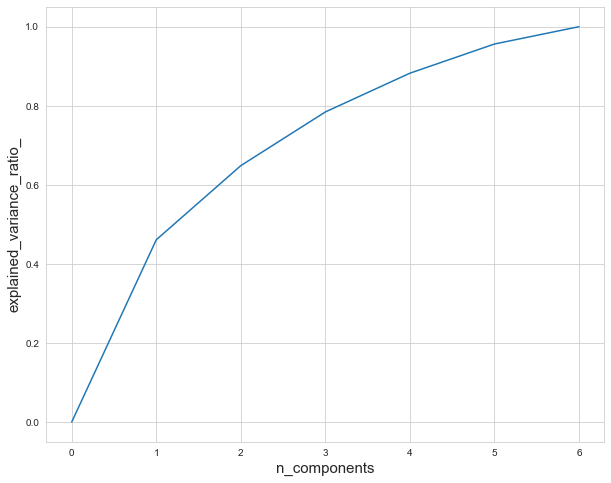

In [11]:
#累積寄与率を可視化
plt.figure(figsize=(10, 8))
plt.plot(np.hstack([0, pca.explained_variance_ratio_.cumsum()]))
plt.xlabel("n_components", fontsize=15)
plt.ylabel("explained_variance_ratio_", fontsize=15)
plt.show()

In [12]:
#各主成分負荷量を数値化
pca.components_

array([[ 0.30080785,  0.49289178,  0.38063453,  0.50898063,  0.39436984,
         0.32726262],
       [ 0.04221029,  0.0765448 ,  0.69521578, -0.38331141,  0.17389431,
        -0.57607928],
       [-0.05898335, -0.73043106,  0.04150427,  0.38478597,  0.54078717,
        -0.14407571],
       [ 0.80159275,  0.02736268, -0.36601146,  0.10099765, -0.04170419,
        -0.45912547],
       [ 0.38716678, -0.1932467 , -0.02643827, -0.64085394,  0.37522525,
         0.51046142],
       [-0.33437231,  0.42376414, -0.48518697, -0.15829258,  0.61583212,
        -0.26250137]])

<AxesSubplot:>

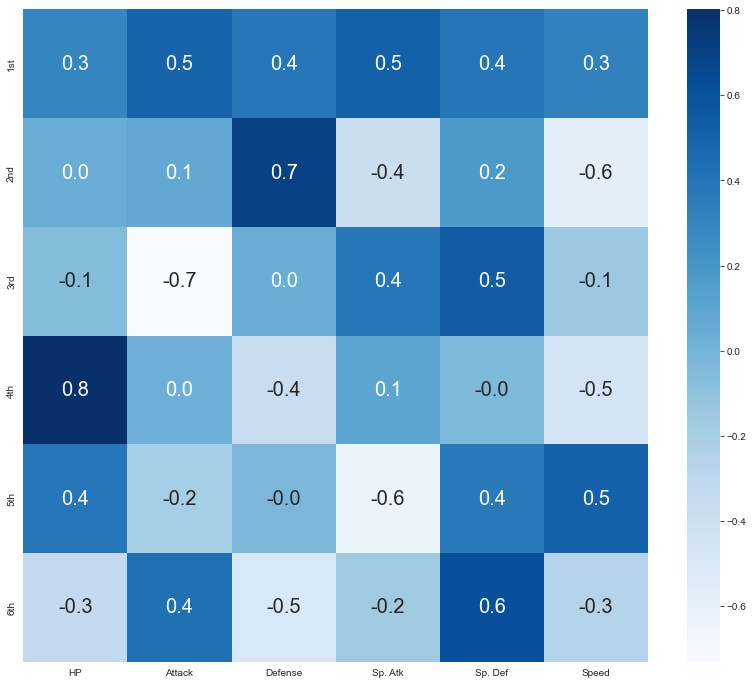

In [14]:
#各主成分の負荷率を可視化
plt.figure(figsize=(14, 12))
sns.heatmap(pca.components_, 
            cmap='Blues', 
            annot=True, 
            annot_kws={"size": 20},
            fmt="1.1f",
            xticklabels=df.loc[:, 'HP':'Speed'].columns,
            yticklabels=['1st', '2nd', '3rd', '4th', '5th', '6th'])

<AxesSubplot:xlabel='1st', ylabel='2nd'>

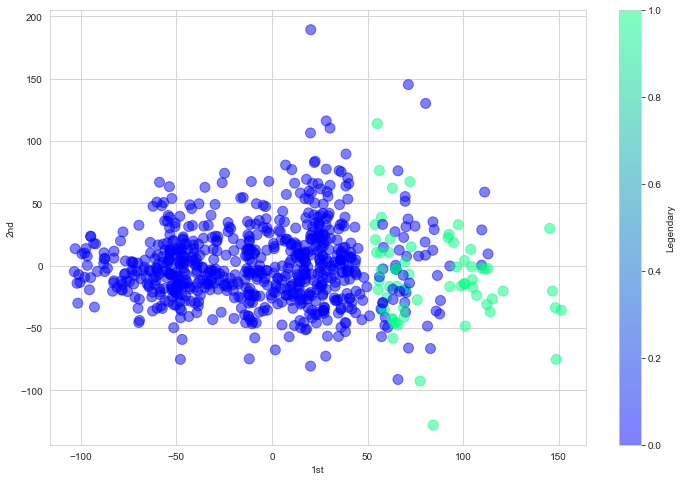

In [13]:
#横軸:第一主成分,縦軸:第二主成分
df_pca['Legendary'] = df['Legendary']

fig, ax = plt.subplots(figsize=(12 , 8))
df_pca.plot(kind='scatter', x='1st', y='2nd', s=100, 
            c='Legendary', cmap='winter', alpha=0.5, ax=ax)

<AxesSubplot:xlabel='1st', ylabel='3rd'>

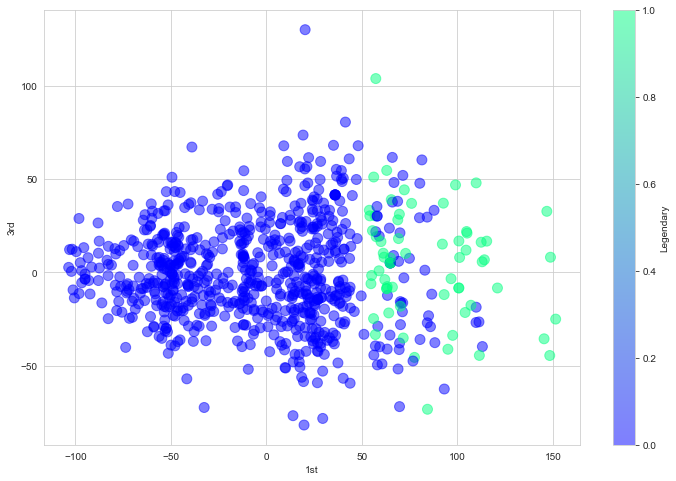

In [14]:
#横軸:第一主成分,縦軸:第三主成分
df_pca['Legendary'] = df['Legendary']

fig, ax = plt.subplots(figsize=(12 , 8))
df_pca.plot(kind='scatter', x='1st', y='3rd', s=100, 
            c='Legendary', cmap='winter', alpha=0.5, ax=ax)